In [1]:
import os 
import sys

from matplotlib import pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../')
import config

# AIS train data

In [2]:
train_data = pd.read_csv(os.path.join(config.DATA_DIR, '00-raw/ais_train.csv'), sep='|')

In [3]:
train_data.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3


In [4]:
train_data.shape

(1522065, 11)

In [5]:
train_data.describe().iloc[1:,:]

,cog,sog,rot,heading,navstat,latitude,longitude
mean,178.249396,6.331703,0.505456,176.273681,2.092604,36.584970,11.536464
std,107.678507,7.539364,17.609157,107.085986,2.411965,22.904879,68.715718
min,0.000000,0.000000,-127.000000,0.000000,0.000000,-47.532870,-167.540930
25%,78.200000,0.000000,0.000000,75.000000,0.000000,34.516830,-5.212810
50%,183.800000,0.500000,0.000000,180.000000,0.000000,42.233700,4.234350
75%,269.000000,14.100000,0.000000,265.000000,5.000000,51.351970,18.837150
max,360.000000,102.300000,128.000000,511.000000,15.000000,70.557200,178.805380


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522065 entries, 0 to 1522064
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   time       1522065 non-null  object 
 1   cog        1522065 non-null  float64
 2   sog        1522065 non-null  float64
 3   rot        1522065 non-null  int64  
 4   heading    1522065 non-null  int64  
 5   navstat    1522065 non-null  int64  
 6   etaRaw     1522065 non-null  object 
 7   latitude   1522065 non-null  float64
 8   longitude  1522065 non-null  float64
 9   vesselId   1522065 non-null  object 
 10  portId     1520450 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 127.7+ MB


In [7]:
train_data.isna().sum()

time            0
cog             0
sog             0
rot             0
heading         0
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
dtype: int64

<Axes: >

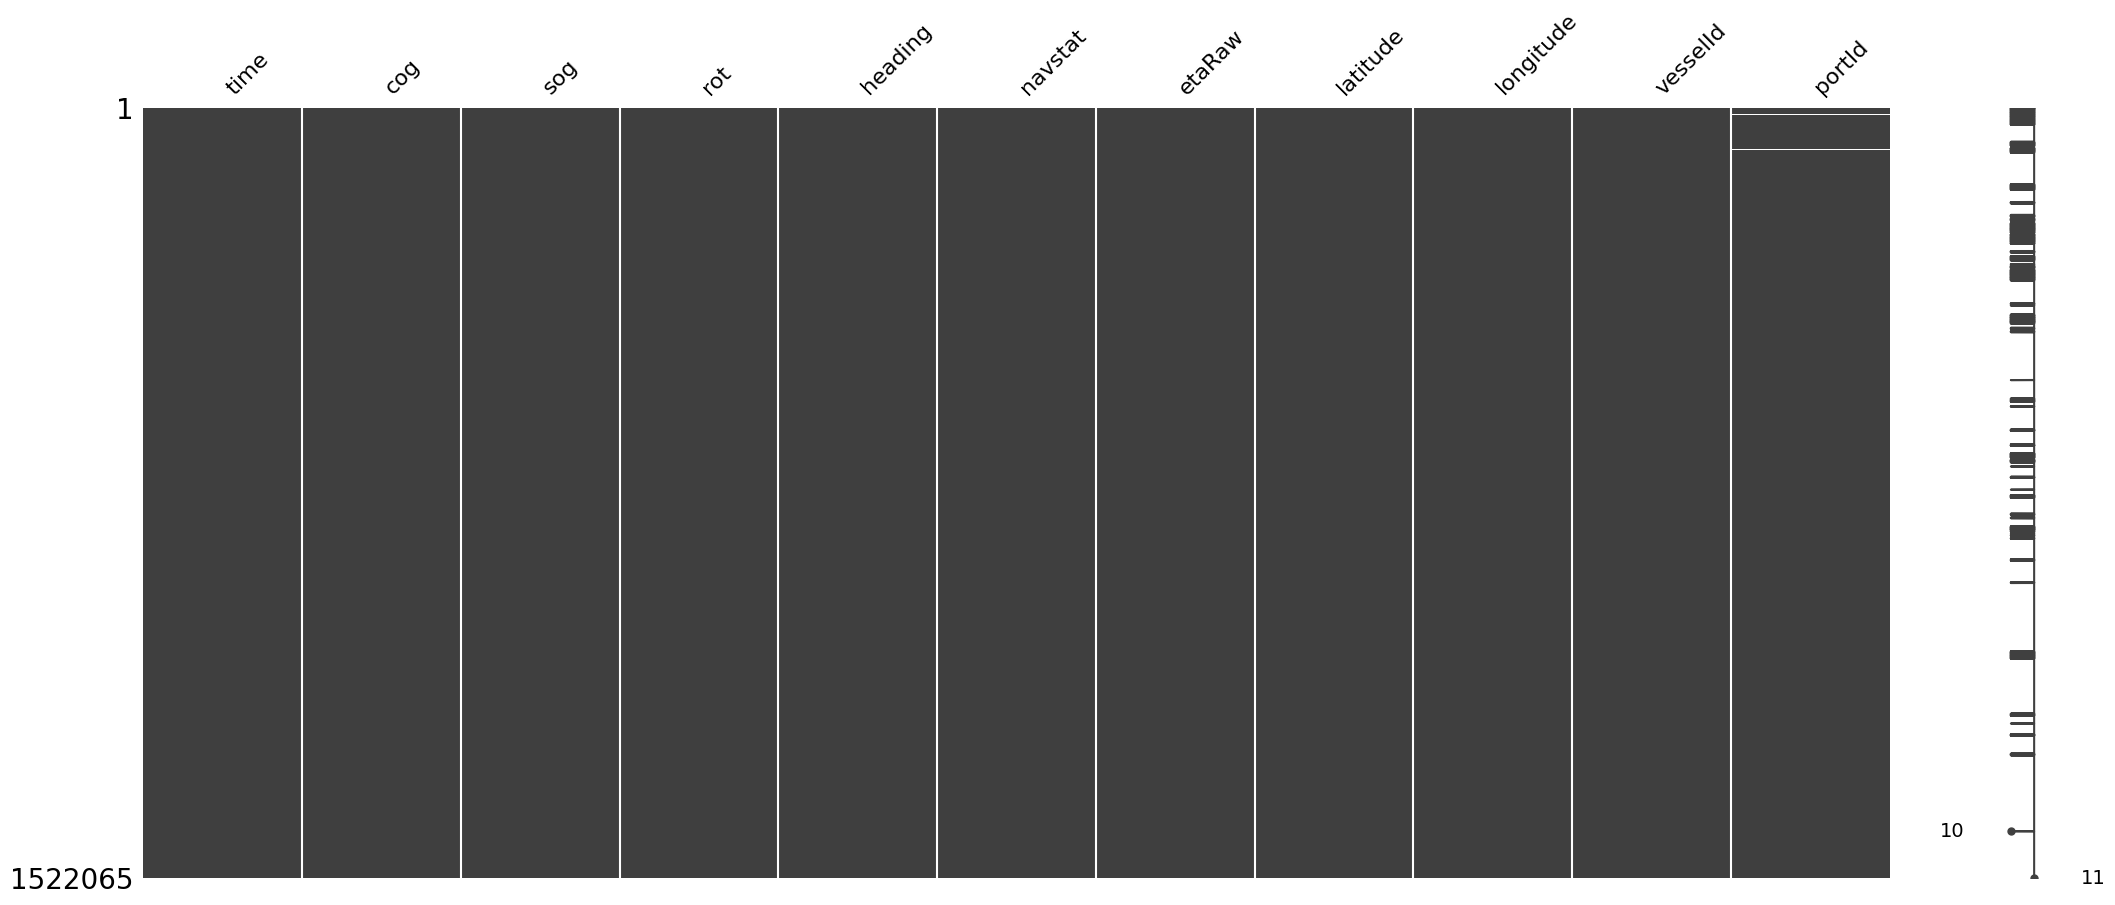

In [8]:
msno.matrix(train_data)

### Univariate analysis

 **Time**

In [9]:
train_data.time.head()

0    2024-01-01 00:00:25
1    2024-01-01 00:00:36
2    2024-01-01 00:01:45
3    2024-01-01 00:03:11
4    2024-01-01 00:03:51
Name: time, dtype: object

In [10]:
train_data.time = pd.to_datetime(train_data.time)

In [11]:
train_data.time.isna().sum()

np.int64(0)

In [12]:
train_data.time.describe()

count                          1522065
mean     2024-03-06 03:20:23.657231360
min                2024-01-01 00:00:25
25%                2024-02-03 02:59:19
50%                2024-03-07 12:34:57
75%                2024-04-07 07:37:36
max                2024-05-07 23:59:08
Name: time, dtype: object

 **Cog**

In [13]:
train_data['cog'].replace(360, np.nan, inplace=True)

/var/folders/sz/sv4w8zxs0l9g59yx7yjgl9580000gn/T/ipykernel_28953/1087479312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['cog'].replace(360, np.nan, inplace=True)


In [14]:
train_data.isna().sum()

time            0
cog          5858
sog             0
rot             0
heading         0
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
dtype: int64

In [15]:
train_data.cog.describe()[1:]

mean    177.547186
std     107.290902
min       0.000000
25%      78.000000
50%     183.000000
75%     268.000000
max     359.900000
Name: cog, dtype: float64

[]

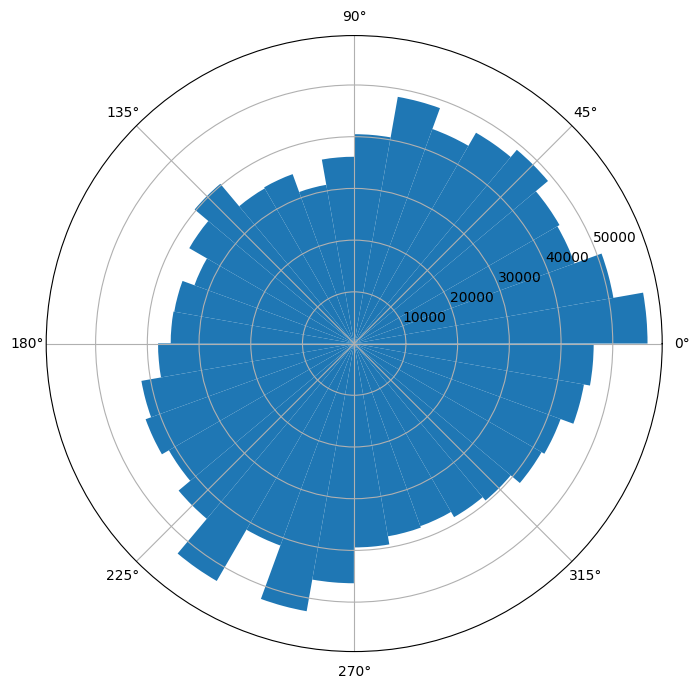

In [16]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(np.deg2rad(train_data['cog'].dropna()), bins=36)
plt.plot()

A notable concentration of vessels heading between 0° and 90° (north-east)

 **Sog**

In [17]:
train_data.sog.describe()[1:]

mean      6.331703
std       7.539364
min       0.000000
25%       0.000000
50%       0.500000
75%      14.100000
max     102.300000
Name: sog, dtype: float64

In [18]:
train_data['sog']= train_data['sog'].replace(102.3, np.nan)

In [19]:
train_data.isna().sum()

time            0
cog          5858
sog           393
rot             0
heading         0
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
dtype: int64

<Axes: xlabel='sog', ylabel='Count'>

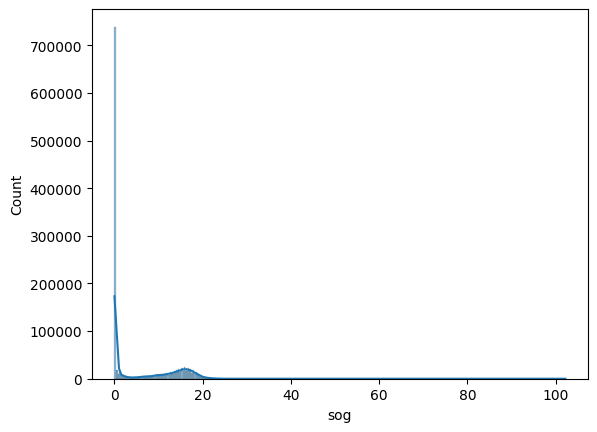

In [20]:
sns.histplot(train_data['sog'].dropna(), kde=True)

 **Sog**

In [21]:
train_data['rot'] = train_data['rot'].replace(128, np.nan)

<Axes: xlabel='rot', ylabel='Count'>

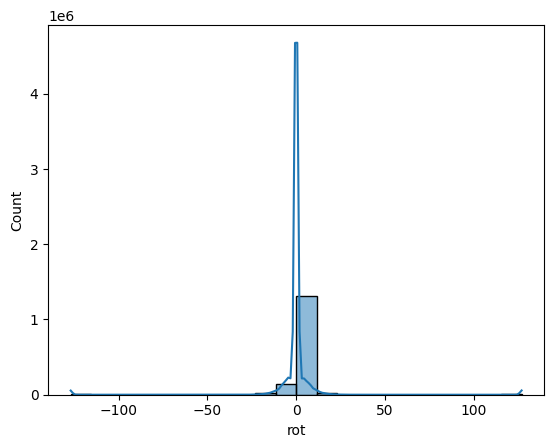

In [22]:
sns.histplot(train_data['rot'].dropna(), kde=True)

In [23]:
train_data['rot'].isna().sum()

np.int64(5563)

In [24]:
train_data['rot'].describe()[1:]

mean      0.037767
std      15.854755
min    -127.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     127.000000
Name: rot, dtype: float64

 **Heading**

In [25]:
train_data['heading'] = train_data['heading'].replace(511, np.nan)

In [26]:
train_data.isna().sum()

time            0
cog          5858
sog           393
rot          5563
heading      4895
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
dtype: int64

In [27]:
train_data.heading.describe()[1:]

mean    175.193720
std     105.554482
min       0.000000
25%      75.000000
50%     180.000000
75%     264.000000
max     483.000000
Name: heading, dtype: float64

In [28]:
train_data[(train_data.heading>359)]

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
581301,2024-02-20 07:36:36,275.4,0.0,8.0,483.0,5,02-18 15:00,53.57729,8.5507,61e9f3adb937134a3c4bfe35,61d375e793c6feb83e5eb3e2


Only one value with wrong heading, lets remove it

In [29]:
train_data = train_data[~(train_data.heading>359)]

 **Navstat**

In [30]:
navstat_mapping = {
    0: 'Under way using engine',
    1: 'At anchor',
    2: 'Not under command',
    3: 'Restricted manoeuverability',
    4: 'Constrained by her draught',
    5: 'Moored',
    6: 'Aground',
    7: 'Engaged in Fishing',
    8: 'Under way sailing',
    9: 'Reserved',
    10: 'Reserved',
    11: 'Reserved',
    12: 'Reserved',
    13: 'Reserved',
    14: 'AIS-SART is active',
    15: 'Not defined'
}

# Map the codes to descriptions
train_data_codes = train_data['navstat'].map(navstat_mapping)

In [31]:
train_data_codes.value_counts(dropna=False)

navstat
Under way using engine         782099
Moored                         605830
At anchor                      129515
Not under command                2081
Under way sailing                 948
Not defined                       670
Aground                           521
Constrained by her draught        232
Restricted manoeuverability       161
Reserved                            5
AIS-SART is active                  1
Engaged in Fishing                  1
Name: count, dtype: int64

In [32]:
navstat_mapping = {
    0: 'Under way using engine',
    1: 'At anchor',
    2: 'Not under command',
    3: 'Restricted manoeuverability',
    4: 'Constrained by her draught',
    5: 'Moored',
    6: 'Aground',
    7: 'Undefined',
    8: 'Under way sailing',
    9: 'Undefined',
    10: 'Undefined',
    11: 'Undefined',
    12: 'Undefined',
    13: 'Undefined',
    14: 'Undefined',
    15: 'Undefined'
}
train_data['navstat'] = train_data['navstat'].map(navstat_mapping)

In [33]:
train_data.navstat.value_counts(dropna=False)

navstat
Under way using engine         782099
Moored                         605830
At anchor                      129515
Not under command                2081
Under way sailing                 948
Undefined                         677
Aground                           521
Constrained by her draught        232
Restricted manoeuverability       161
Name: count, dtype: int64

 **etaraw**

In [34]:
train_data['etaRaw'].head()

0    01-09 23:00
1    12-29 20:00
2    01-02 09:00
3    12-31 20:00
4    01-25 12:00
Name: etaRaw, dtype: object

In [35]:
eta_decoded = pd.to_datetime(train_data['etaRaw'], format='%m-%d %H:%M', errors='coerce')
eta_decoded = eta_decoded.apply(lambda x: x.replace(year=2024) if pd.notnull(x) else x)


In [36]:
eta_decoded

0         2024-01-09 23:00:00
1         2024-12-29 20:00:00
2         2024-01-02 09:00:00
3         2024-12-31 20:00:00
4         2024-01-25 12:00:00
                  ...        
1522060   2024-05-08 05:00:00
1522061   2024-05-10 03:00:00
1522062   2024-05-15 23:00:00
1522063   2024-05-08 12:45:00
1522064   2024-05-07 23:00:00
Name: etaRaw, Length: 1522064, dtype: datetime64[ns]

In [37]:
train_data['eta_hours'] = (eta_decoded - train_data['time']).dt.total_seconds() / 3600  # In hours


In [38]:
train_data.eta_hours.describe()[1:]

mean     147.564266
std     1115.533636
min    -3068.983611
25%      -18.677917
50%        0.370556
75%       26.676250
max     8783.834722
Name: eta_hours, dtype: float64

I'll leave negative eta, maybe it has some inherent meaning to it and it's not just a mistake. Maybe the ship was supposed to arrive but hasn't yet

In [39]:
train_data = train_data.drop(columns=['etaRaw'])

In [40]:
train_data

,time,cog,sog,rot,heading,navstat,latitude,longitude,vesselId,portId,eta_hours
0,2024-01-01 00:00:25,284.0,0.7,0.0,88.0,Under way using engine,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f,214.993056
1,2024-01-01 00:00:36,109.6,0.0,-6.0,347.0,At anchor,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689,8731.990000
2,2024-01-01 00:01:45,111.0,11.0,0.0,112.0,Under way using engine,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19,32.970833
3,2024-01-01 00:03:11,96.4,0.0,0.0,142.0,At anchor,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126,8779.946944
4,2024-01-01 00:03:51,214.0,19.7,0.0,215.0,Under way using engine,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3,587.935833
...,...,...,...,...,...,...,...,...,...,...,...
1522060,2024-05-07 23:59:07,359.1,13.4,0.0,1.0,Under way using engine,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417,5.014722
1522061,2024-05-07 23:59:08,12.3,17.1,0.0,13.0,Under way using engine,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1,51.014444
1522062,2024-05-07 23:59:08,269.8,14.9,-1.0,270.0,Under way using engine,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b,191.014444
1522063,2024-05-07 23:59:08,8.0,18.7,0.0,6.0,Under way using engine,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b,12.764444


In [41]:
train_data.isna().sum()

time             0
cog           5858
sog            393
rot           5563
heading       4895
navstat          0
latitude         0
longitude        0
vesselId         0
portId        1615
eta_hours    15245
dtype: int64

 **latitude** and  **longitude**

In [42]:
train_data.latitude.describe()[1:]

mean    36.584959
std     22.904882
min    -47.532870
25%     34.516827
50%     42.233700
75%     51.351970
max     70.557200
Name: latitude, dtype: float64

In [43]:
train_data.longitude.describe()[1:]

mean     11.536466
std      68.715740
min    -167.540930
25%      -5.212813
50%       4.234350
75%      18.837195
max     178.805380
Name: longitude, dtype: float64

In [44]:
train_data.sort_values(['vesselId', 'time'])

,time,cog,sog,rot,heading,navstat,latitude,longitude,vesselId,portId,eta_hours
131115,2024-01-12 14:07:47,308.1,17.1,-6.0,316.0,Under way using engine,7.50361,77.58340,61e9f38eb937134a3c4bfd8b,61d376b393c6feb83e5eb50c,-104.129722
131279,2024-01-12 14:31:00,307.6,17.3,5.0,313.0,Under way using engine,7.57302,77.49505,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,56.983333
131514,2024-01-12 14:57:23,306.8,16.9,5.0,312.0,Under way using engine,7.65043,77.39404,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,56.543611
131696,2024-01-12 15:18:48,307.9,16.9,6.0,313.0,Under way using engine,7.71275,77.31394,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,56.186667
131885,2024-01-12 15:39:47,307.0,16.3,7.0,313.0,Under way using engine,7.77191,77.23585,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,55.836944
...,...,...,...,...,...,...,...,...,...,...,...
1521244,2024-05-07 22:36:16,324.1,13.5,-2.0,325.0,Under way using engine,59.63337,21.43237,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,4.395556
1521409,2024-05-07 22:57:05,324.2,13.3,-3.0,326.0,Under way using engine,59.69588,21.34225,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,4.048611
1521625,2024-05-07 23:17:54,356.5,12.2,-1.0,354.0,Under way using engine,59.76388,21.35317,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,3.701667
1521821,2024-05-07 23:38:13,52.6,17.3,3.0,50.0,Under way using engine,59.83316,21.38489,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,3.363056


In [45]:
train_data.to_csv(os.path.join(config.DATA_DIR, '01-ais/01-data.csv'), index = False)